In [73]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [74]:
df = pd.read_csv("/content/Iris.csv")

In [75]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
encoder =LabelEncoder()

In [78]:
df['Species'] = encoder.fit_transform(df['Species'])

In [79]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [80]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [81]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

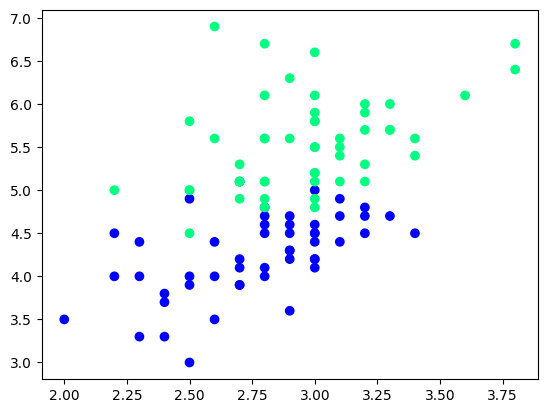

In [83]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [84]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [85]:
df_train

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
99,2.8,4.1,1
93,2.3,3.3,1
101,2.7,5.1,2
92,2.6,4.0,1
123,2.7,4.9,2
106,2.5,4.5,2
117,3.8,6.7,2
142,2.7,5.1,2
81,2.4,3.7,1


In [86]:
df_val

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
137,3.1,5.5,2
149,3.0,5.1,2
130,2.8,6.1,2
125,3.2,6.0,2


In [87]:
df_test

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
95,3.0,4.2,1
124,3.3,5.7,2
148,3.4,5.4,2
86,3.1,4.7,1


In [88]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

Case 1 - Bagging

In [89]:
# Data for Tree 1
dt_bag = df_train.sample(8,replace=True)

X = dt_bag.iloc[:,0:2]
y = dt_bag.iloc[:,-1]

dt_bag

,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
121,2.8,4.9,2
93,2.3,3.3,1
142,2.7,5.1,2
93,2.3,3.3,1
92,2.6,4.0,1
123,2.7,4.9,2
93,2.3,3.3,1


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [91]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf=clf,legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))

In [100]:
clf1 = DecisionTreeClassifier()

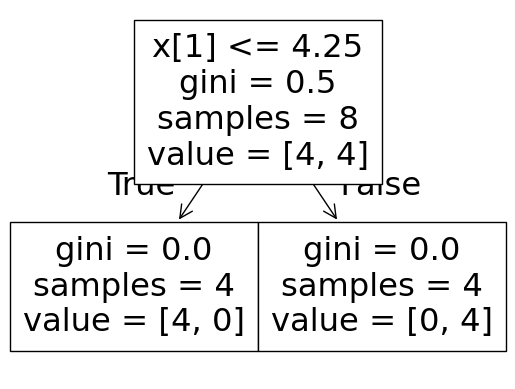

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


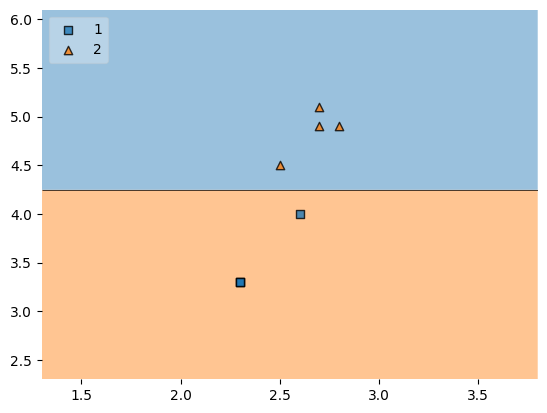

In [101]:
X_clf1 = dt_bag.iloc[:,0:2]
y_clf1 = dt_bag.iloc[:,-1]
evaluate(clf1, X_clf1, y_clf1)

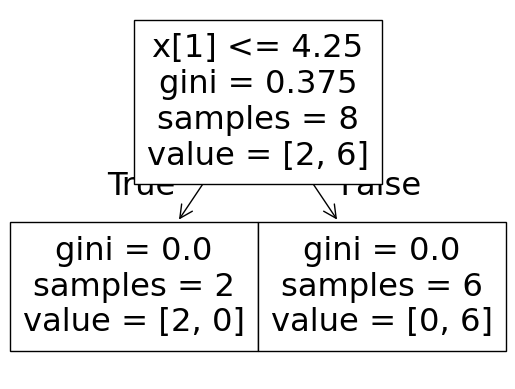

1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
123,2.7,4.9,2
101,2.7,5.1,2
142,2.7,5.1,2
117,3.8,6.7,2
142,2.7,5.1,2
93,2.3,3.3,1
92,2.6,4.0,1


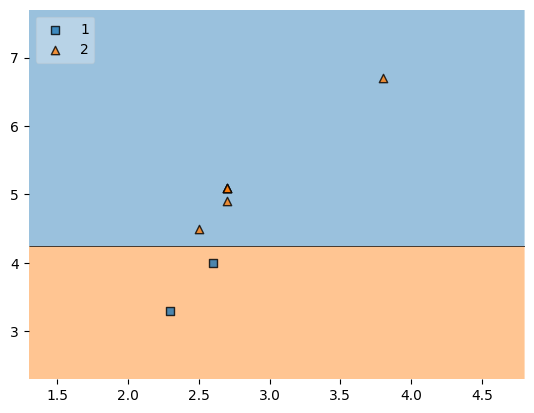

In [102]:
# Data for Tree 2
bootstrapped_data2 = df_train.sample(8,replace=True)

X_clf2 = bootstrapped_data2.iloc[:,0:2]
y_clf2 = bootstrapped_data2.iloc[:,-1]

clf2 = DecisionTreeClassifier() # Initialize the second classifier
evaluate(clf2, X_clf2, y_clf2) # Train the second classifier

bootstrapped_data2 # Display the bootstrapped data

In [103]:
# Training for Tree 2 moved to the previous cell (1hxGKP5V3p5U)
# This cell is no longer needed in its original form.

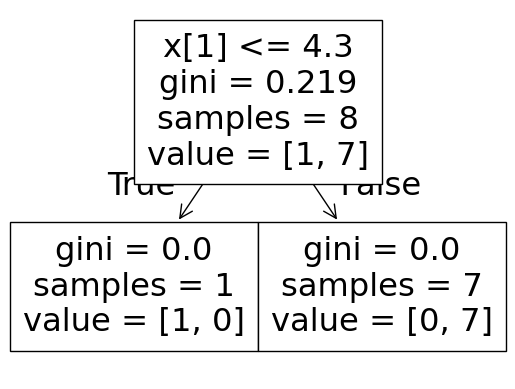

1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
142,2.7,5.1,2
142,2.7,5.1,2
121,2.8,4.9,2
99,2.8,4.1,1
101,2.7,5.1,2
106,2.5,4.5,2
123,2.7,4.9,2


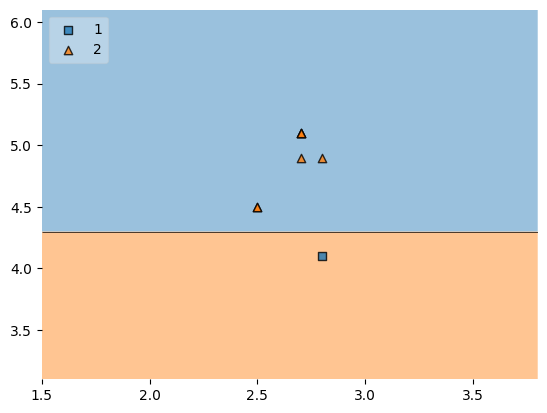

In [104]:
# Data for Tree 3
bootstrapped_data3 = df_train.sample(8,replace=True)

X_clf3 = bootstrapped_data3.iloc[:,0:2]
y_clf3 = bootstrapped_data3.iloc[:,-1]

clf3 = DecisionTreeClassifier() # Initialize the third classifier
evaluate(clf3, X_clf3, y_clf3) # Train the third classifier

bootstrapped_data3 # Display the bootstrapped data

In [105]:
# Training for Tree 3 moved to the previous cell (sawHHync4FjX)
# This cell is no longer needed in its original form.

Predict

In [98]:
df_test

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
95,3.0,4.2,1
124,3.3,5.7,2
148,3.4,5.4,2
86,3.1,4.7,1


In [109]:
print("Predictor 1",clf1.predict(np.array([3.1,4.7]).reshape(1,2)))
print("Predictor 2",clf2.predict(np.array([3.1,4.7]).reshape(1,2)))
print("Predictor 3",clf3.predict(np.array([3.1,4.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting

In [110]:
# Row sampling without replacemnt
df_train

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
99,2.8,4.1,1
93,2.3,3.3,1
101,2.7,5.1,2
92,2.6,4.0,1
123,2.7,4.9,2
106,2.5,4.5,2
117,3.8,6.7,2
142,2.7,5.1,2
81,2.4,3.7,1


In [111]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
101,2.7,5.1,2
106,2.5,4.5,2
92,2.6,4.0,1
117,3.8,6.7,2
121,2.8,4.9,2
81,2.4,3.7,1
93,2.3,3.3,1


Random Subspaces

In [112]:
df1 = pd.read_csv("/content/Iris.csv")

In [113]:
df1 = df1.sample(10)

In [114]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
29,30,4.7,3.2,1.6,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica


In [123]:
df.sample(2,replace=True,axis=1)

,PetalLengthCm,PetalLengthCm
101,5.1,5.1
67,4.1,4.1
79,3.5,3.5
122,6.7,6.7
120,5.7,5.7
...,...,...
61,4.2,4.2
140,5.6,5.6
73,4.7,4.7
119,5.0,5.0


Random Patches

In [124]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
29,30,4.7,3.2,1.6,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica


In [127]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,PetalLengthCm
132,Iris-virginica,5.6
29,Iris-setosa,1.6
117,Iris-virginica,6.7
86,Iris-versicolor,4.7
29,Iris-setosa,1.6
111,Iris-virginica,5.3
117,Iris-virginica,6.7
143,Iris-virginica,5.9
